### Sprint Review III

¿Qué logramos en este sprint?:
- Lenguaje_prog
- Salario_max (casi lo hemos conseguido categorizar)
- Varias visualizaciones (gráficas)
- Separar salarios por países
- Importar la librería de europa y filtrar los datos por Europa
- Profundizar en las preguntas y aproximarnos a la elaboración de dataframes al respecto de ellas

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import sidetable
import re 
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [77]:
df = pd.read_pickle("data/data_limpieza.pickle")

In [78]:
df.shape

(25973, 22)

In [79]:
df.isnull().sum()*100/df.shape[0]

level_0                   0.000000
index                     0.000000
time                      0.000000
age                       0.000000
gender                    0.000000
pais                      0.000000
formacion                 0.000000
puesto                    0.000000
experiencia_prog          0.000000
lenguaje_top              3.977207
exp_ml                    8.543487
tamaño_empresa           37.431179
uso_ml                   38.582374
salario                  40.742309
inversion_ml             41.543141
ppal_herramienta_data    28.814538
lenguaje_prog             3.973357
plataforma                4.000308
plat_cursos              30.189042
nubes                    64.671005
plataforma_top           87.960574
salario_max              40.742309
dtype: float64

#### Histograma por puestos segun especialidad


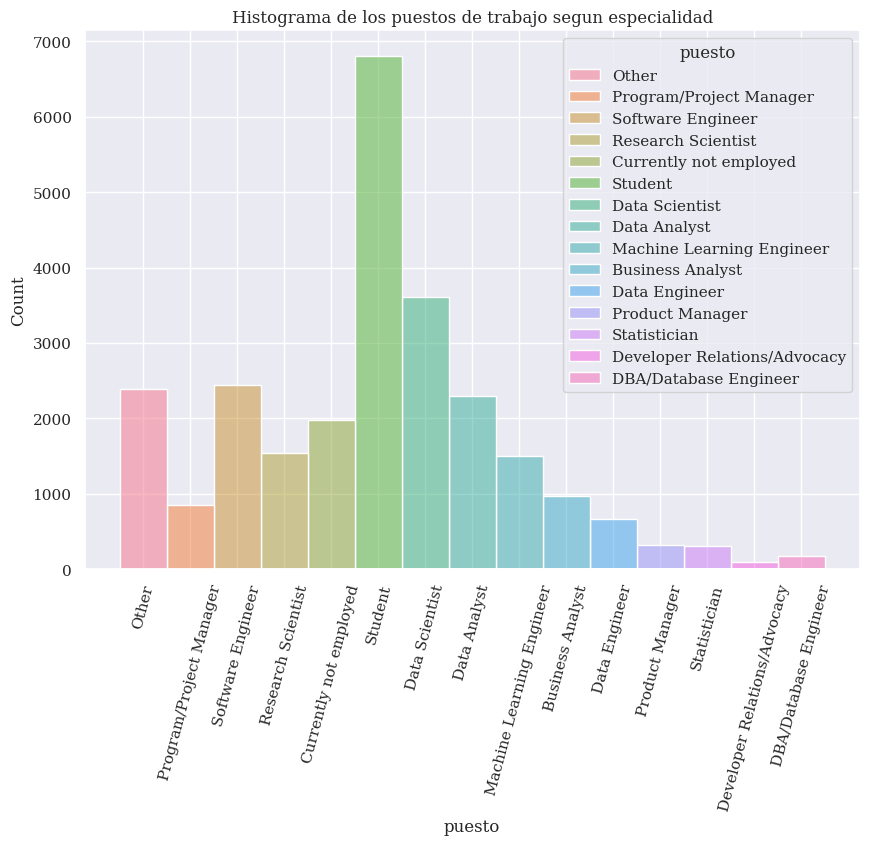

In [80]:
plt.figure(figsize =(10,7))

fig = sns.histplot(x=df['puesto'], data = df, hue = 'puesto', kde=True)
fig.set_title('Histograma de los puestos de trabajo segun especialidad')
plt.xticks(rotation= 75)

plt.show()

#### Counplot por sexos segun especialidad

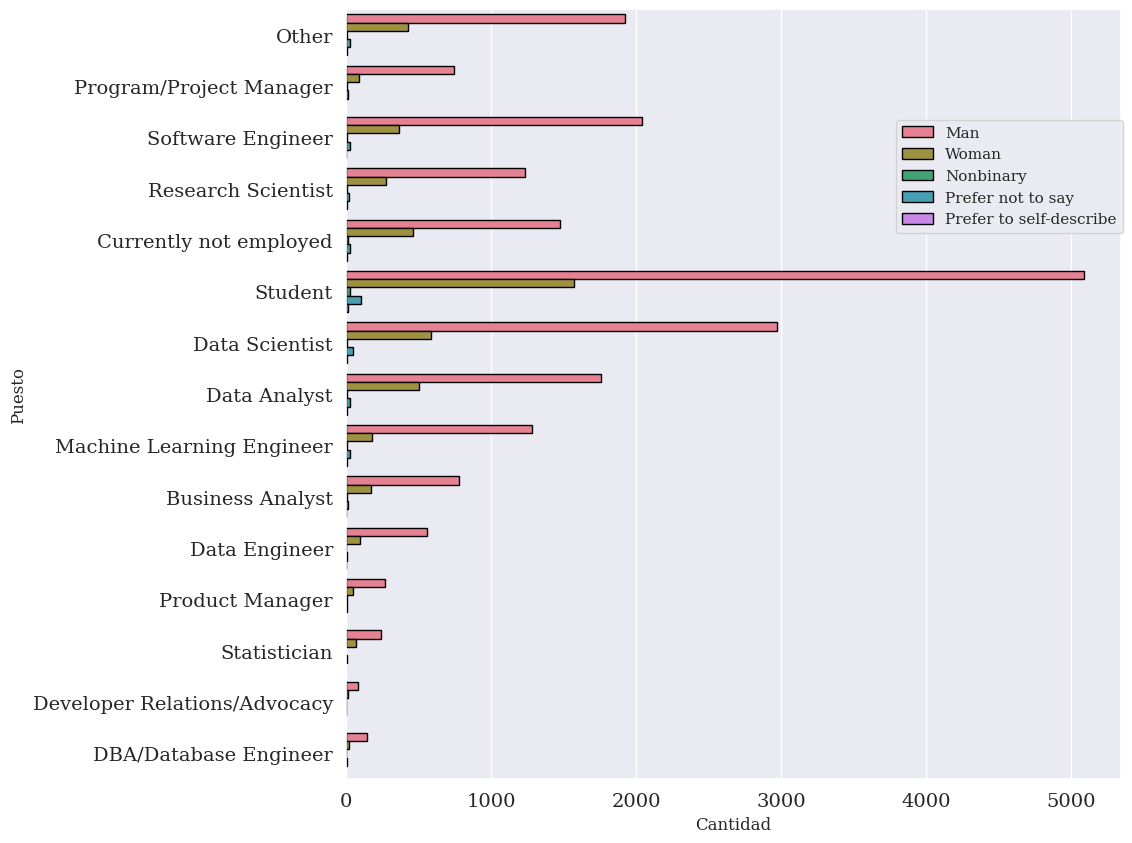

In [81]:
plt.figure(figsize = (10, 10))

fig = sns.countplot(data = df, y = "puesto", hue = "gender", palette = "husl", edgecolor = "black")
fig.set(xlabel = "Cantidad", ylabel = "Puesto")

sns.set(font = "serif")

plt.legend(bbox_to_anchor = (0.7, 0.7))
plt.xlabel("Cantidad", fontsize = 20, font = "serif")
plt.ylabel("Puesto", fontsize = 20, font = "serif")

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14);

#### Counplot por puesto segun la formacion

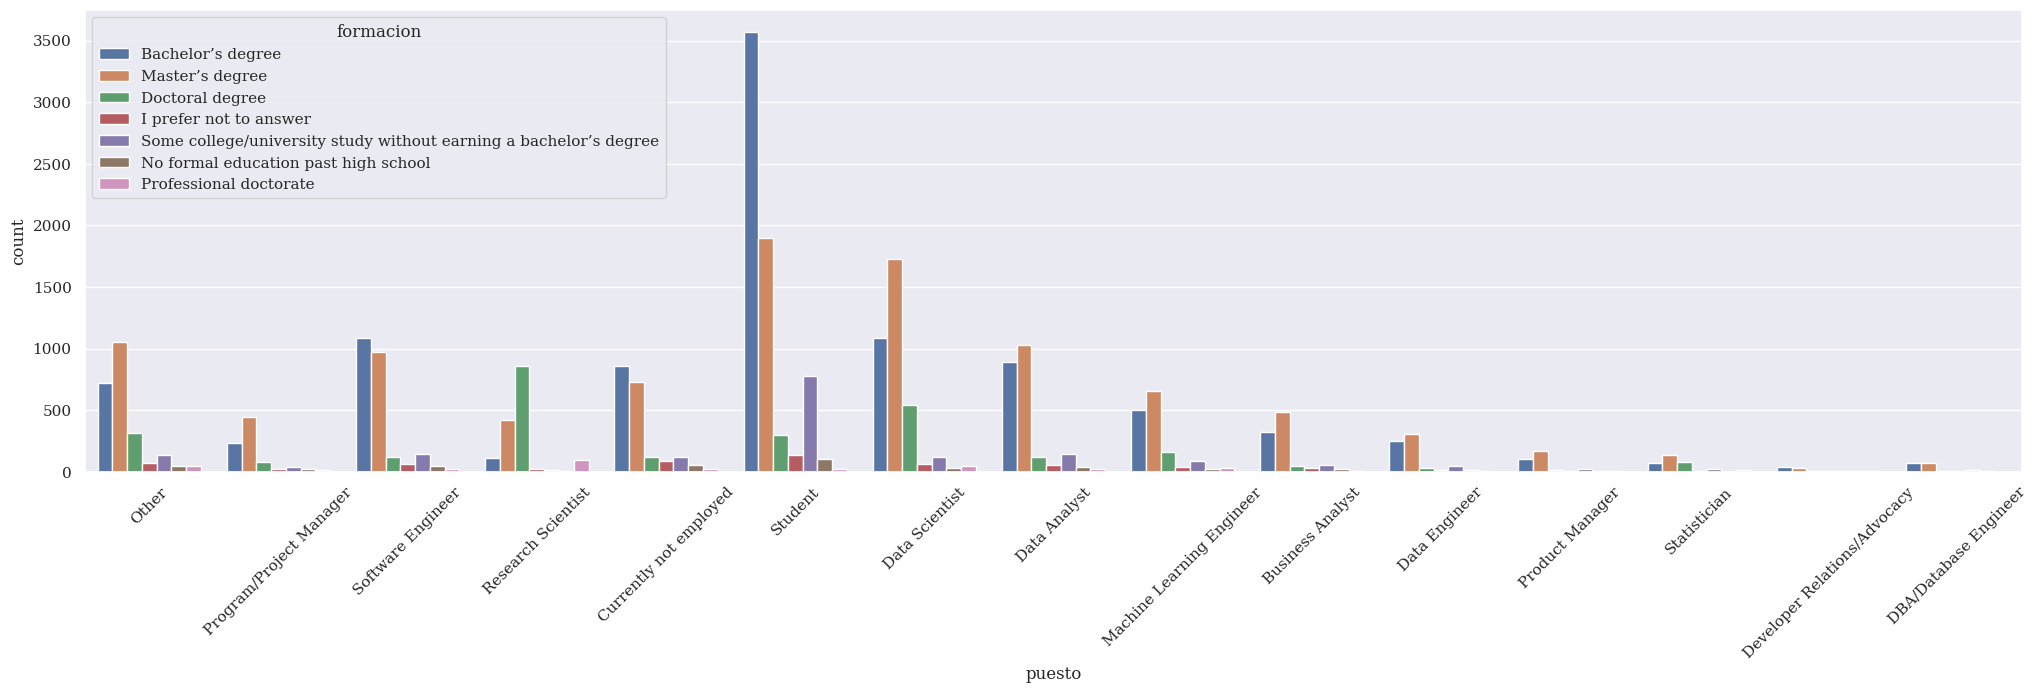

In [82]:
plt.figure( figsize=(25,6))

fig = sns.countplot(x = 'puesto', data = df, hue= 'formacion')
plt.xticks(rotation = 45)

plt.show(); 

#### Counplot por puesto segun herramientas data

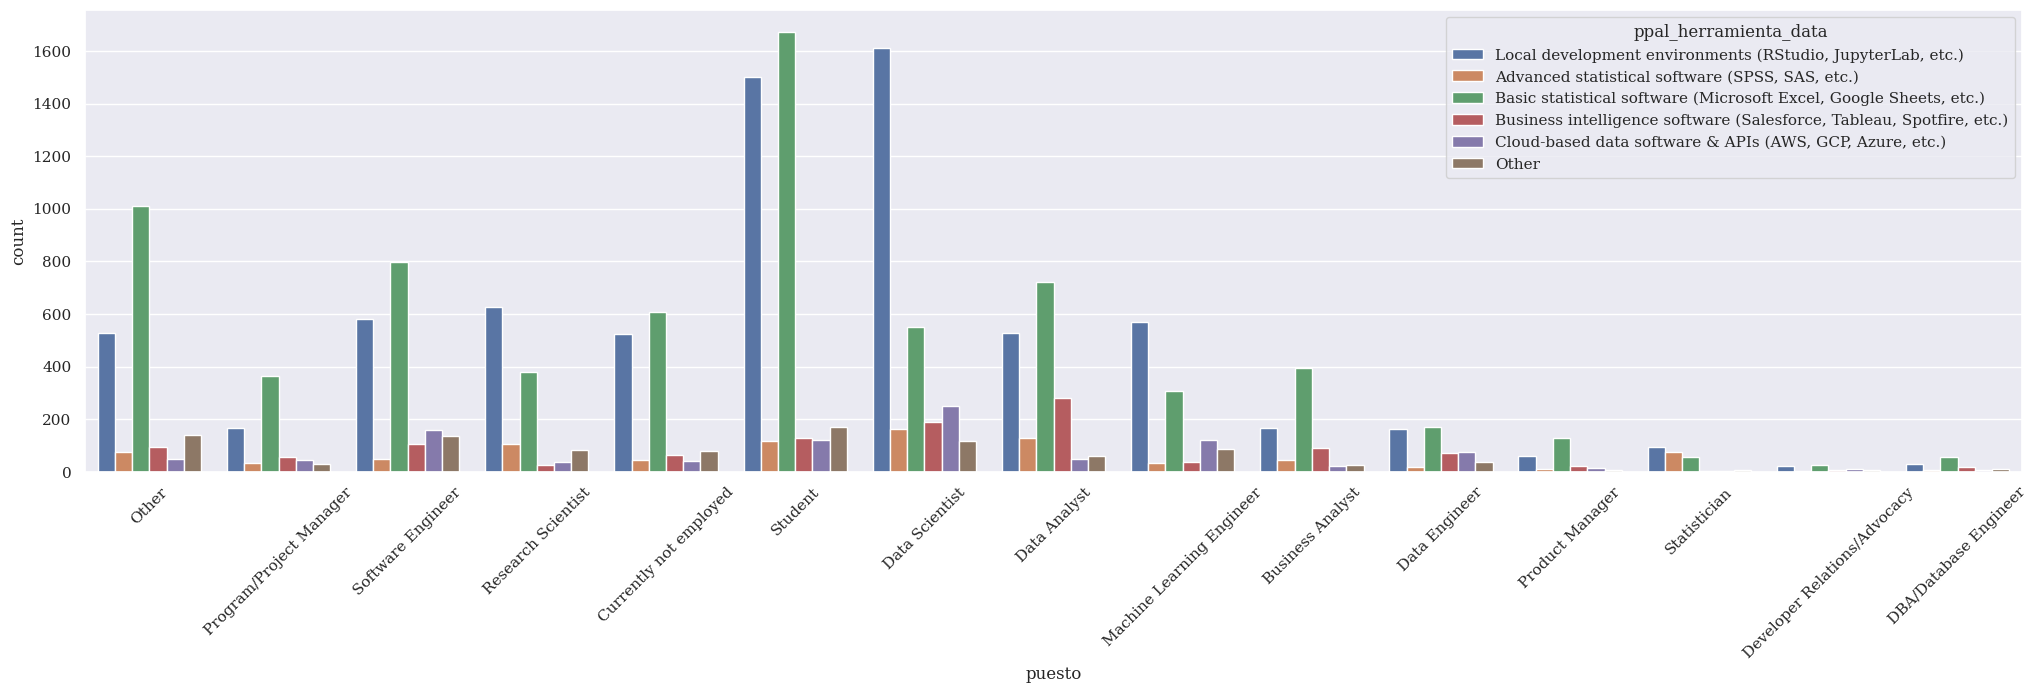

In [83]:
plt.figure( figsize=(25,6))

fig = sns.countplot(x = 'puesto', data = df, hue= 'ppal_herramienta_data')

plt.xticks(rotation = 45)
plt.show(); 

----

#### Comenzamos a analizar la columna lenguaje_prog:

In [84]:
print(df["lenguaje_prog"].isnull().sum())


1032


In [85]:
df_lenguajeprog_sinnulos = df.copy()

In [86]:
df_lenguajeprog_sinnulos["lenguaje_prog"].replace(np.nan,"unknown",inplace=True)

In [87]:
df_lenguajeprog_sinnulos['Lenguaje']= df_lenguajeprog_sinnulos["lenguaje_prog"].apply(lambda x: x.split(',')) 

     Una vez categorizados los nulos ya podemos separar la columna

In [88]:
df_lenguajeprog_sinnulos.head(2)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,exp_ml,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max,Lenguaje
0,0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,50-249 employees,No (we do not use ML methods),25000-29999,$100-$999,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"edX,Kaggle Learn Courses,DataCamp,Udacity,Udemy","GitHub , Kaggle",NaN,29999,"[Python, R]"
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,"1000-9,999 employees",We are exploring ML methods (and may one day p...,60000-69999,$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook","Kaggle Learn Courses,Cloud-certification progr...",NaN,NaN,69999,"[ SQL, C, C++, Java]"


       Esta funcion nos ha creado una sola columna con una lista de valores.
       Decidimos separar cada respuesta en  una columna separada.

In [89]:
df_lenguajeprog_sinnulos[['1','2','3','4','5','6','7','8','9','10','11','12']] = df_lenguajeprog_sinnulos["lenguaje_prog"].str.split(',', expand=True, n=-1)

In [90]:
pd.options.display.max_columns=None
df_lenguajeprog_sinnulos.sample(5)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,exp_ml,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max,Lenguaje,1,2,3,4,5,6,7,8,9,10,11,12
3257,3257,3257,623,25-29,Man,Philippines,Bachelor’s degree,Software Engineer,3-5 years,Python,< 1 year,0-49 employees,No (we do not use ML methods),10000-14999,$0 ($USD),"Local development environments (RStudio, Jupyt...","Javascript, Other",Visual Studio Code (VSCode),Kaggle Learn Courses,NaN,NaN,14999,"[ Javascript, Other]",Javascript,Other,None,None,None,None,None,None,None,None,None,None
15336,15336,15336,559,35-39,Woman,Tunisia,Master’s degree,Student,1-3 years,R,I do not use machine learning methods,NaN,NaN,NaN,NaN,NaN,"Python, SQL, Javascript","Notepad++, Sublime Text",NaN,NaN,NaN,NaN,"[Python, SQL, Javascript]",Python,SQL,Javascript,None,None,None,None,None,None,None,None,None
17816,17816,17816,746,25-29,Man,India,Master’s degree,Data Scientist,< 1 years,Python,2-3 years,250-999 employees,We are exploring ML methods (and may one day p...,3000-3999,$1-$99,"Basic statistical software (Microsoft Excel, G...",Python,Visual Studio,"edX,Kaggle Learn Courses,DataCamp,Fast.ai,Udac...","Streamlit , GitHub , Kaggle , Colab",Amazon Web Services (AWS),3999,[Python],Python,None,None,None,None,None,None,None,None,None,None,None
16299,16299,16299,385,25-29,Man,India,Master’s degree,Machine Learning Engineer,3-5 years,Python,4-5 years,50-249 employees,"We have well established ML methods (i.e., mod...",3000-3999,$1-$99,"Local development environments (RStudio, Jupyt...",Python,"PyCharm ,Jupyter Notebook",Udemy,"GitHub , Kaggle",Google Cloud Platform (GCP),3999,[Python],Python,None,None,None,None,None,None,None,None,None,None,None
13520,13520,13520,576,35-39,Prefer not to say,India,Master’s degree,Business Analyst,1-3 years,Python,I do not use machine learning methods,"1000-9,999 employees","We recently started using ML methods (i.e., mo...",20000-24999,$1-$99,"Basic statistical software (Microsoft Excel, G...",Java,None,"Kaggle Learn Courses,Udemy",I do not share my work publicly,NaN,24999,[ Java],Java,None,None,None,None,None,None,None,None,None,None,None


In [91]:
df_lenguajeprog_sinnulos["1"][0:3]

0    Python
1       SQL
2    Python
Name: 1, dtype: object

In [92]:
df_lenguajeprog_sinnulos["1"].value_counts()

Python         21860
unknown         1032
 SQL             850
 R               757
 C               350
 None            319
 Other           237
 C++             178
 Java            164
 Javascript      119
 MATLAB           71
 Bash             15
 Swift            13
 Julia             8
Name: 1, dtype: int64

In [93]:
df_lenguajeprog_sinnulos["2"].value_counts()

 SQL           7128
 R             4577
 C             2090
 C++           1648
 Java           945
 Javascript     774
 MATLAB         567
 Other          499
 Bash           289
 Julia           53
 Swift           30
Name: 2, dtype: int64

In [94]:
df_lenguajeprog_sinnulos["3"].value_counts()

 SQL           2778
 C++           2074
 C             1709
 Java          1516
 Javascript    1227
 MATLAB         775
 Bash           683
 Other          659
 Julia           73
 Swift           40
Name: 3, dtype: int64

In [95]:
df_lenguajeprog_sinnulos["4"].value_counts()

 C++           1253
 Java          1153
 Javascript    1021
 MATLAB         622
 Bash           576
 Other          568
 C              560
 Julia           67
 Swift           51
Name: 4, dtype: int64

In [96]:
df_lenguajeprog_sinnulos["5"].value_counts()

 Java          743
 Javascript    594
 MATLAB        404
 C++           382
 Other         306
 Bash          300
 Julia          45
 Swift          32
Name: 5, dtype: int64

In [97]:
df_lenguajeprog_sinnulos.columns

Index(['level_0', 'index', 'time', 'age', 'gender', 'pais', 'formacion',
       'puesto', 'experiencia_prog', 'lenguaje_top', 'exp_ml',
       'tamaño_empresa', 'uso_ml', 'salario', 'inversion_ml',
       'ppal_herramienta_data', 'lenguaje_prog', 'plataforma', 'plat_cursos',
       'nubes', 'plataforma_top', 'salario_max', 'Lenguaje', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12'],
      dtype='object')

----

In [98]:
#df_explode =df_lenguajeprog_sinnulos.explode('Lenguaje')

In [99]:
#df_group_leng =pd.DataFrame(df_explode.groupby('Lenguaje')['Lenguaje'].count())


In [100]:
#df_group_leng.rename(columns={'Lenguaje':'conteo_eleccion'}, inplace= True)

In [101]:
#df_group_leng.reset_index(inplace=True)

---

        Realizamos analisis respecto a los registros del DataFrame original sin tener en cuenta el explode.


In [102]:
total=df_lenguajeprog_sinnulos.shape[0]
total

25973

In [103]:
def porcentajes (x):
    return round((x/total)*100, 2)

In [104]:
#df_group_leng['porcentaje']= df_group_leng['conteo_eleccion'].apply(porcentajes)


#### Barplot con los porcentajes segun tipo de lenguaje de programacion

        Vemos que realizar una comparacion entre variables categoricas con el dataframe que ya tiene agrupado por lenguaje no nos sirve, por lo que vamos a trabajar directamente sobre el df_explode que tiene todos los registros.

#### Countplot segun puesto y lenguajes de programacion

In [105]:
lista_puesto= ['Program/Project Manager',
 'Software Engineer',
 'Research Scientist',
 'Data Scientist',
 'Data Analyst',
 'Machine Learning Engineer',
 'Business Analyst',
 'Data Engineer',
 'Product Manager',
 'Statistician',
 'Developer Relations/Advocacy',
 'DBA/Database Engineer']

In [106]:
#df_puesto_filtrado['puesto'].unique()

In [107]:
df['puesto'].value_counts()

Student                         6804
Data Scientist                  3616
Software Engineer               2449
Other                           2393
Data Analyst                    2301
Currently not employed          1986
Research Scientist              1538
Machine Learning Engineer       1499
Business Analyst                 968
Program/Project Manager          849
Data Engineer                    668
Product Manager                  319
Statistician                     313
DBA/Database Engineer            171
Developer Relations/Advocacy      99
Name: puesto, dtype: int64

----


#### Comenzamos a trabajar con la columna de salario 

In [108]:
df['salario'].unique()

array(['25000-29999', '60000-69999', '0-999', '30000-39999', nan,
       '15000-19999', '70000-79999', '2000-2999', '10000-14999',
       '5000-7499', '20000-24999', '1000-1999', '100000-124999',
       '7500-9999', '4000-4999', '40000-49999', '50000-59999',
       '3000-3999', '300000-499999', '200000-249999', '125000-149999',
       '250000-299999', '80000-89999', '90000-99999', '150000-199999',
       '-1000000', '500000-999999'], dtype=object)

In [109]:
df['salario']=df["salario"].str.replace(',','').str.replace('$','').str.replace('>','-') 
#Quitamos todos los simbolos que estaban por demas en el string.

/var/folders/db/hp0l5_js4yv8br5y2tc3frpm0000gn/T/ipykernel_3971/3692967412.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['salario']=df["salario"].str.replace(',','').str.replace('$','').str.replace('>','-')


In [110]:
df['salario_max']=df["salario"].str.split('-', n=1, expand=True).get(1) 
# Separamos el rango del salario para quedarnos con el mayor y poder convertir la columna en numerica

In [111]:
df['salario_max'].unique()

array(['29999', '69999', '999', '39999', None, '19999', '79999', '2999',
       '14999', '7499', '24999', '1999', '124999', '9999', '4999',
       '49999', '59999', '3999', '499999', '249999', '149999', '299999',
       '89999', '99999', '199999', '1000000', '999999'], dtype=object)

In [112]:
df[df["salario"] == "1000000"].count()

level_0                  0
index                    0
time                     0
age                      0
gender                   0
pais                     0
formacion                0
puesto                   0
experiencia_prog         0
lenguaje_top             0
exp_ml                   0
tamaño_empresa           0
uso_ml                   0
salario                  0
inversion_ml             0
ppal_herramienta_data    0
lenguaje_prog            0
plataforma               0
plat_cursos              0
nubes                    0
plataforma_top           0
salario_max              0
dtype: int64

In [113]:
print(df["salario_max"].isnull().sum())
print(df["salario"].isnull().sum())

10582
10582


In [114]:
df['salario_max']=df['salario_max'].astype("Int64", errors= 'ignore')


In [115]:
df["salario_max"].isnull().sum()

10582

In [116]:
df_estudiantes = df[df["puesto"] == "Student"]
print(df_estudiantes.shape)
print('----------')
print(df_estudiantes["salario_max"].isnull().sum())


(6804, 22)
----------
6804


In [117]:
df_other = df[df["puesto"] == "Other"]
print(df_other.shape)
print('----------')
print(df_other["salario_max"].isnull().sum())

(2393, 22)
----------
189


In [118]:
df_desem = df[df["puesto"] == "Currently not employed"]
print(df_desem.shape)
print('----------')
print(df_desem["salario_max"].isnull().sum())

(1986, 22)
----------
1986


### Students, Others, Currently not employed, crear un df donde no los encluya para poder hacer un KNN

In [119]:
df["rango_salario"] = pd.cut(df["salario_max"], 12, right = True, labels = ["Salario muy bajo",
                "Salario bajo", "Salario bajo-medio", "Salario bajo-medio", "Salario medio", "Salario medio-alto", 
                "Salario alto", "Salario alto", "Salario muy alto", "Salario muy alto", "Salario altísimo", "Salario altísimo"], 
                ordered = False)

In [120]:
df.sample(5)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,exp_ml,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max,rango_salario
2038,2038,2038,573,55-59,Man,United States of America,Bachelor’s degree,Program/Project Manager,20+ years,Python,2-3 years,"10,000 or more employees","We recently started using ML methods (i.e., mo...",100000-124999,$100-$999,"Basic statistical software (Microsoft Excel, G...","Python, C, C++, Other","Visual Studio ,Visual Studio Code (VSCode) ,Ju...","Kaggle Learn Courses,Udemy",GitHub,Microsoft Azure,124999,Salario bajo
7642,7642,7642,414,22-24,Man,India,Bachelor’s degree,Student,1-3 years,Python,< 1 year,NaN,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G...","Python, SQL","Visual Studio Code (VSCode) ,PyCharm , Spyder,...","Udacity,Udemy",NaN,NaN,<NA>,NaN
531,531,531,985,40-44,Man,Japan,Bachelor’s degree,Other,1-3 years,Python,I do not use machine learning methods,"10,000 or more employees",No (we do not use ML methods),80000-89999,$100-$999,"Basic statistical software (Microsoft Excel, G...",Python,Jupyter Notebook,NaN,Kaggle,NaN,89999,Salario bajo
10783,10783,10783,668,30-34,Man,India,Master’s degree,Software Engineer,1-3 years,Python,< 1 year,"1000-9,999 employees",We use ML methods for generating insights (but...,25000-29999,"$1000-$9,999","Cloud-based data software & APIs (AWS, GCP, Az...","Python, R, SQL, Javascript","Visual Studio Code (VSCode) ,PyCharm","Kaggle Learn Courses,LinkedIn Learning,Cloud-c...","GitHub , Personal blog , Kaggle",Amazon Web Services (AWS),29999,Salario muy bajo
15089,15089,15089,1580,22-24,Woman,Indonesia,Bachelor’s degree,Data Scientist,1-3 years,Python,< 1 year,0-49 employees,"We recently started using ML methods (i.e., mo...",0-999,$0 ($USD),"Local development environments (RStudio, Jupyt...","Python, R, SQL, C, C++, Java, Javascript","RStudio ,Visual Studio Code (VSCode) ,PyCharm ...","Udemy,LinkedIn Learning",NaN,NaN,999,Salario muy bajo


In [121]:
df_salarios_pais= pd.DataFrame(df.groupby(['pais','gender', 'puesto'])['salario_max'].mean().round(2))

#### Importamos libreria AWOC para trabajar con los paises 

-----


### COMO SEPARAR POR EUROPA EN UNA COLUMNA 

In [122]:
#pip install a-world-of-countries #Instalacion de libreria

In [123]:
# Import the AWOC package.
import awoc

# Initialize the AWOC class.
my_world = awoc.AWOC()

In [124]:
europa= my_world.get_countries_list_of('Europe')



In [125]:
df['europa']= 'NO'
for x in df['pais'].unique():
    if x in europa: 
        df.loc[df['pais'] == x, ['europa']] = 'SI'
            #print ('YES')


In [126]:
df_europa = df[df['europa']=='SI']
df_europa.head(3)

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,exp_ml,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max,rango_salario,europa
8,8,8,1744,22-24,Man,Russia,Bachelor’s degree,Currently not employed,3-5 years,Python,< 1 year,NaN,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G...","Python, SQL",Other,Kaggle Learn Courses,NaN,NaN,<NA>,NaN,SI
15,15,15,563,35-39,Man,Greece,Doctoral degree,Research Scientist,10-20 years,Python,4-5 years,50-249 employees,We use ML methods for generating insights (but...,10000-14999,$0 ($USD),"Local development environments (RStudio, Jupyt...","Python, C, C++, MATLAB",Spyder,"Udacity,University Courses (resulting in a uni...",NaN,NaN,14999,Salario muy bajo,SI
16,16,16,1315,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,20+ years,Python,1-2 years,"1000-9,999 employees",We are exploring ML methods (and may one day p...,2000-2999,$0 ($USD),"Local development environments (RStudio, Jupyt...","Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Kaggle Learn Courses,Cloud-certification progr...",NaN,NaN,2999,Salario muy bajo,SI


In [127]:
df['europa'].unique()

array(['NO', 'SI'], dtype=object)

----

#### Próximos objetivos:
- Filtrar por todos los países de Europa, para realizar el analisis, según genero, salario, puesto, formación.
- Terminar de acordar los dataframes a las preguntas
- Elaborar las conclusiones de cada pregunta
- Organizar los archivos por preguntas (por ejemplo) o por tipo (EDA o limpieza) y hacer el README
- Presentación, plasmar tipo de idea ¨empresa de venta programas¨

### - ¿Cual es el ratio de hombres y mujeres segun el perfil? (posibilidad nivel mundial)
- Columnas que toca:
        - gender= no tiene nulos asique esta lista, verificar unique para descartar que no tenga cosas raras.
        - puesto = tampoco tiene nulos, ver uniques y ver si recategorizamos por menos cantidades.
        - formacion = tampoco tiene nulos, ver uniques y ver si recategorizamos  ver que hacemos con los estudiantes y otros.
### - ¿Cual es perfil educativo para cada puesto? (Europa)
- Columnas que toca:
    - puesto = no tiene nulos ver si categorizamos mejor o si nos enfocamos en uno en particular.
    - formacion= no tiene nulos, ver que hacer con studens o los que no respondieron.
Ver si damos vuelta de rosca y lo profundizamos mas para mujeres y un pais o continente especifico!
### - Herramientas mas utilizadas segun los perfiles. (leguaje_prog y plataforma)(Europa)
- Columnas que toca:
    - ppal_herramienta_data: tiene muchos muchos nulos, ver si podemos aplicar alguno de los metodos de imputer para solucionarlo o en el caso que lo sesgemos solo para un area especifica volver a verificar nulos ahi.
    - puesto = no tiene nulos, ver lo de la recategorizacion
Me parece interesante poder mezclar esta pregunta con otras dos columnas mas como son lenguaje_prog y plataforma para poder tener el combo de todo lo que se usa en ese area.
### - ¿Cuál es la diferencia de salarios entre hombres y mujeres segun el perfil? 
- Columnas que toca:
    - gender: no tiene nulos
    - salarios : poder hacer analisis de numeros con medias y demas segun genero.. verificar que cantidad de datos de hombre y mujer hay en el dataframe para jugar un poco con la poderacion.
### - Perfil segun pais que herramientas usan, en coparativa con España.
- Columnas que toca:
    -pais: no tiene nulos, los vamos a fraccionar y analizar solo algunos?
    -herramientas de trabajo tenemos que alinearlo con  loque hagamos con los paises y demas preguntas.
Extras:
- ¿Cómo se distribuye este porcentaje segun los paises?

In [128]:
df.shape

(25973, 24)

In [129]:
#df['nubes'].unique()

df_nubes = df.explode("nubes", ignore_index=False)

df_nubes.sample(2)

In [130]:
df["nubes"].replace(np.nan,"unknown",inplace=True)

In [131]:
df['lista_nubes']= df["nubes"].apply(lambda x: x.split(','))

In [132]:
#df['nubes'].unique()

---

### Mari:
- Hago una copia del dataframe para seguir el mismo proceso que con lenguaje_prog y que los datos sean accesibles.

In [133]:
df_nubes = df.copy()

In [134]:
df_nubes["nubes"].replace(np.nan,"unknown",inplace=True)

- Cambio este string largo por una sola palabra que se entiende mejor, quitadlo si queréis pero a mí me parece conveniente:

In [135]:
df_nubes["nubes"].replace("I do not share my work publicly","Private",inplace=True)

In [136]:
df_nubes.sample()

,level_0,index,time,age,gender,pais,formacion,puesto,experiencia_prog,lenguaje_top,exp_ml,tamaño_empresa,uso_ml,salario,inversion_ml,ppal_herramienta_data,lenguaje_prog,plataforma,plat_cursos,nubes,plataforma_top,salario_max,rango_salario,europa,lista_nubes
9288,9288,9288,561,25-29,Man,Spain,Professional doctorate,Student,5-10 years,MATLAB,3-4 years,NaN,NaN,NaN,NaN,"Advanced statistical software (SPSS, SAS, etc.)","Python, R, SQL, C++, Javascript, MATLAB","RStudio ,PyCharm ,MATLAB","Udemy,Other",unknown,NaN,<NA>,NaN,SI,[unknown]


Intento sustituir respuestas largas en una única palabra para que la división entre strings tenga más sentido pero no funciona con todos:



df["nubes"].replace("Personal blog","blogging",inplace=True)

df['nubes']= df["nubes"].apply(lambda x: x.strip())

df['nubes']= df["nubes"].apply(lambda x: x.join)

df['nubes'].unique()

- Columna nubes_lista creada spliteando por las comas:

In [137]:
df_nubes["nubes_lista"] = df_nubes["nubes"].apply(lambda x: x.split(','))

- Intento crear las nuevas columnas para hacer un df:

In [138]:
#df_nubes[['1','2','3','4','5','6','7', '8', '9', '10', '11']] = df_nubes["nubes"].str.split(',', expand=True, n=-1)

- Antes lo conseguí, queda este value_counts() de recuerdo:

In [139]:
#df_nubes["1"].value_counts()

In [140]:
#df_nubes.head(5)

- Antes me quedé aquí, intentando crear el dataframe. Probé tanto con "nubes_lista" como con "nubes" (cuando hicimos el de lenguaje_prog lo hicimos sobre "lenguaje_prog" en lugar de sobre "Lenguaje", que era la lista creada a posteriori).

In [141]:
#df_solo_nubes = pd.DataFrame(df_nubes.groupby('nubes_lista')['nubes_lista'].count())


****

In [142]:
df["lenguaje_prog"].replace(np.nan,"unknown",inplace=True)# Convertimos los nulos de la columna 'lenguaje_prog' a "unknown"

In [143]:
df['lenguaje_lista']= df["lenguaje_prog"].apply(lambda x: x.split(',')) #Generamos una columna nueva de lenguaje con la lista de las opciones elegidas por cada registro

---

In [144]:
df.to_pickle('data/data_final.pickle')